In [1]:
from sklearn.datasets import make_circles 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch 
from torch import nn

In [2]:
#Make 1000 samples 
n_samples = 1000

X, y = make_circles(n_samples, noise=0.3, random_state=42)


In [3]:
X, y

(array([[ 0.59171471,  0.43674853],
        [-0.45745002,  0.36160118],
        [-1.01069349,  0.83042101],
        ...,
        [-0.01985814, -1.02765007],
        [ 0.54269168, -1.11429774],
        [ 0.24539316,  1.01154823]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [4]:
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles

,X1,X2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
...,...,...,...
995,0.312050,0.696566,0
996,-1.069302,-0.485523,0
997,-0.019858,-1.027650,1
998,0.542692,-1.114298,0


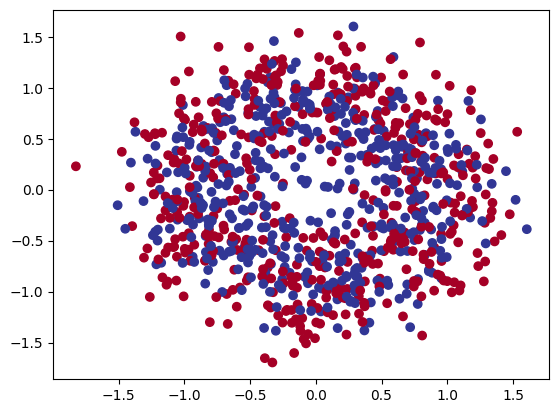

In [5]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X_sample = X[:]
y_sample = y[0]
X_sample, y_sample

(array([[ 0.59171471,  0.43674853],
        [-0.45745002,  0.36160118],
        [-1.01069349,  0.83042101],
        ...,
        [-0.01985814, -1.02765007],
        [ 0.54269168, -1.11429774],
        [ 0.24539316,  1.01154823]]),
 np.int64(1))

In [8]:
torch.__version__

'2.9.0+cu126'

In [9]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_train, y_test = y_train.unsqueeze(1), y_test.unsqueeze(1)


In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device
X_train.size(), X_test.size(), y_train.size(), y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800, 1]),
 torch.Size([200, 1]))

In [14]:
class CircleModel1v0(nn.Module):
    def __init__(self):
        super().__init__()
        # self.layer_1 = nn.Linear(in_features=2, out_features=5)
        # self.layer_2 = nn.Linear(in_features=5, out_features=1)
        self.layerTwo= nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.ReLU(),
            nn.Linear(in_features=5, out_features=50),
            nn.ReLU(),
            nn.Linear(in_features=50, out_features=1))
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.layerTwo(x)

In [15]:
torch.manual_seed(42)
model_0 = CircleModel1v0().to(device)
model_0.state_dict()

OrderedDict([('layerTwo.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layerTwo.0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layerTwo.2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140],
                      [-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
                      [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
                      [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
                      [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410],
                      [ 0.1202, -0.1213,  0.1882,  0.3993,  0.2585],
                      [-0.1955,  0.2582,  0.0800,  0.2271, -0.2726],
                      [-0.4427, -0.1728, -0.3430,  0.3670,  0.1288],
                      [ 0.1852,  

In [16]:
torch.manual_seed(42)
loss_fun = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [17]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    return correct / len(y_pred) * 100

In [18]:
epochs = 10000
for _ in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
   
    loss = loss_fun(y_pred, y_train)
    optimizer.zero_grad
    loss.backward()
    optimizer.step()
model_0.eval()

model_0.eval()
with torch.inference_mode():
    y_logit = model_0(X_test)

    y_pred_prob = torch.sigmoid(y_logit)
    y_pred = torch.round(y_pred_prob)
    accuracy = accuracy_fn(y_test, y_pred)
    print(accuracy)




RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cpu, different from other tensors on cuda:0 (when checking argument in method wrapper_CUDA_addmm)

In [ ]:
x = torch.tensor([[1., 5., 2., 7., 3., 9.]])
x.squeeze(0)

In [ ]:
import yfinance as yf


In [ ]:
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2025-12-31"
price_stock = yf.download(tickers=ticker, start=start_date, end=end_date, auto_adjust=True) 
price_stock.head()

In [19]:
import torch 
from torch import nn
import torchvision
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
##Stetp train data

In [20]:
train_data = datasets.FashionMNIST(
    root = "data",
    train= True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download= True, 
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)





100%|██████████| 26.4M/26.4M [00:01<00:00, 13.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 203kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.77MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.7MB/s]


In [21]:
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [22]:
class_names = train_data.classes 
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [23]:
class_to_id = train_data.class_to_idx
class_to_id

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [24]:
len(train_data)

60000

In [25]:
image.size()

torch.Size([1, 28, 28])

Text(0.5, 1.0, '9')

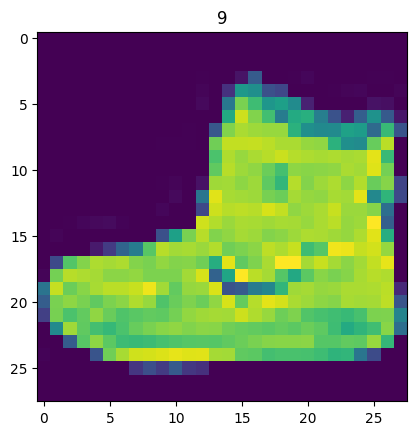

In [26]:
plt.imshow(image.squeeze())
plt.title(label)

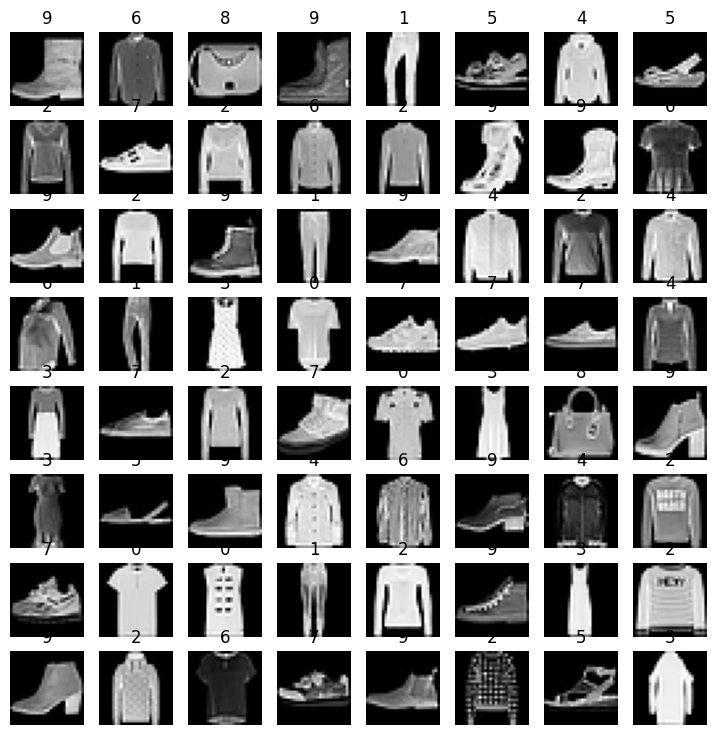

In [27]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 8, 8
for i in range(1, rows*cols +1):
    random_idex = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idex]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)

In [28]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size=BATCH_SIZE, shuffle=False)

In [29]:
train_features_batch, train_label_batch = next(iter(train_loader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

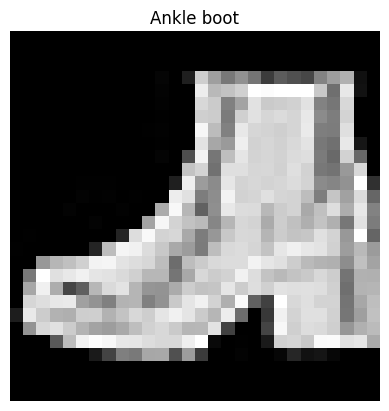

In [30]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item() #grab the first batch from dataload 
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [31]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [32]:
output = flatten_model(x)
output.shape



torch.Size([1, 784])

In [34]:
class FashionMNTModelV0(nn.Module):
    def __init__( self,input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

out = flatten_model(x)
x.shape

In [35]:
torch.manual_seed(42)
model_0 = FashionMNTModelV0(input_shape=784, hidden_units = 10, output_shape=len(class_names)).to("cpu")
model_0

FashionMNTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [36]:

loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [37]:
import requests
from pathlib import Path
url ="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py"
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download....")
else: 
    print("Downloading helper_function.py ....")
    re = requests.get(url)
    with open("helper_functions.py", "wb") as f:
        f.write(re.content)


In [38]:
from helper_functions import accuracy_fn


In [39]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device=None):
    total_time = end - start 
    print(f"Train Time on {device}: {total_time: .3f} seconds")
    return total_time

In [42]:
from tqdm.auto import tqdm
torch.manual_seed(42)
torch_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    train_loss = 0
    for batch, (X, y) in enumerate(train_loader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fun(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%400 == 0:
            print(f"Looked at {batch * len(X)}/ {len(train_data)}")
    train_loss /=len(train_loader)
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_loader:
        
            test_pred = model_0(X_test)
            test_loss += loss_fun(test_pred, y_test)
            test_acc += accuracy_fn(y_true = y_test, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_loader)
        test_acc /=len(test_loader)
    print(f"\nTrain loss: {train_loss: .4f} | Test loss: {test_loss: .4f} | test acc: {test_acc: .4f}")
torch_time_end_cpu = timer()
print_train_time(torch_time_start_on_cpu, torch_time_end_cpu)





  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss:  1.0514 | Test loss:  0.6946 | test acc:  75.7288
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss:  0.6081 | Test loss:  0.5815 | test acc:  79.3930
Looked at 0/ 60000
Looked at 12800/ 60000
Looked at 25600/ 60000
Looked at 38400/ 60000
Looked at 51200/ 60000

Train loss:  0.5384 | Test loss:  0.5445 | test acc:  80.8706
Train Time on None:  26.184 seconds


26.18410179

In [43]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
    data_loader: torch.utils.data,
    loss_fun: torch.nn.Module,
    accuracy_fn):
    loss, acc = 0, 0 
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fun(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss /=len(data_loader)
        acc /= len(data_loader)
    return{
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [44]:
model_0_results = eval_model(model=model_0, data_loader=test_loader, loss_fun=loss_fun, accuracy_fn= accuracy_fn)
model_0_results

{'model_name': 'FashionMNTModelV0',
 'model_loss': 0.54449462890625,
 'model_acc': 80.870607028754}